In [1]:
!pip install pandas matplotlib seaborn gensim nltk wordcloud

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
from gensim import corpora
import nltk
from nltk.corpus import stopwords

In [3]:
# Download NLTK stopwords
nltk.download('stopwords')

# Load data
file_path = 'FA_improve.csv'  # Update with your file path
df = pd.read_csv(file_path)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
print("Data Shape:", df.shape)
print("Data Types:\n", df.dtypes)


Data Shape: (188, 4)
Data Types:
 title       object
selftext    object
comments    object
url         object
dtype: object


In [5]:
df.head()

,title,selftext,comments,url
0,"""Get a better personality!""",What does it actually mean to improve your per...,['I’m always amazed by how much attractive peo...,https://www.reddit.com/r/ForeverAlone/comments...
1,When does it get better?,NaN,"[""I'm 26. I asked when it would get better ten...",https://i.imgur.com/c0U21Y3.png
2,It doesn't get any better with age...,I just turned 35 last week and I unfortunately...,"['[deleted]', ""Yeah, the reality of life set i...",https://www.reddit.com/r/ForeverAlone/comments...
3,A partner won't make your life better,That statement has been thrown around and I've...,"[""The hormones released in your brain during c...",https://www.reddit.com/r/ForeverAlone/comments...
4,Hopefully next year will be better,NaN,"[""I would like both to be done in quick succes...",https://imgur.com/tBQKeIU


In [6]:
#delete url column
df.drop('url', axis=1, inplace=True)

In [7]:
#combine title, selftext and comments columns
df['text'] = df['title'] + ' ' + df['selftext'] + ' ' + df['comments']


In [8]:
df.head()

,title,selftext,comments,text
0,"""Get a better personality!""",What does it actually mean to improve your per...,['I’m always amazed by how much attractive peo...,"""Get a better personality!"" What does it actua..."
1,When does it get better?,NaN,"[""I'm 26. I asked when it would get better ten...",NaN
2,It doesn't get any better with age...,I just turned 35 last week and I unfortunately...,"['[deleted]', ""Yeah, the reality of life set i...",It doesn't get any better with age... I just t...
3,A partner won't make your life better,That statement has been thrown around and I've...,"[""The hormones released in your brain during c...",A partner won't make your life better That sta...
4,Hopefully next year will be better,NaN,"[""I would like both to be done in quick succes...",NaN


In [9]:
#drop title , selftext and comments columns
df.drop(['title', 'selftext', 'comments'], axis=1, inplace=True)
df.head()

,text
0,"""Get a better personality!"" What does it actua..."
1,NaN
2,It doesn't get any better with age... I just t...
3,A partner won't make your life better That sta...
4,NaN


In [10]:
# Convert to lowercase
df['text'] = df['text'].str.lower()

In [11]:
import re
# Convert the column to string type
df['text'] = df['text'].astype(str)
# Remove punctuation and numbers
df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))
df['text'] = df['text'].apply(lambda x: re.sub(r'\d+', ' ', x))
# Remove URLs
df['text'] = df['text'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x, flags=re.MULTILINE))

# Remove special characters
df['text'] = df['text'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]', ' ', x))

In [12]:
# Replace NaNs with empty strings
df['text'] = df['text'].fillna('')

# Tokenization
df['tokens'] = df['text'].apply(lambda x: simple_preprocess(x, deacc=True))

In [13]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('wordnet')
# Remove stopwords
stop_words = set(stopwords.words('english'))
custom_stopwords = {'someth','much','could','also','work','well','feel','better','person','need','someon','improve','improv','like', 'would', 'look', 'good', 'people','thing','even','think','make','time','year','self','life','know' , 'still', 'point', 'want','really'}
stop_words= stop_words.union(custom_stopwords)

#lemmatize and stem
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def lemmatize_and_stem(tokens):
   lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
   stemmed_tokens = [stemmer.stem(word) for word in lemmatized_tokens if word.lower() not in stop_words]
     # Remove words with 3 or fewer characters
   filtered_tokens = [word for word in stemmed_tokens if len(word) > 3]
   return filtered_tokens

df['tokens'] = df['tokens'].apply(lemmatize_and_stem)



[nltk_data] Downloading package wordnet to /root/nltk_data...


In [14]:
# Join tokens back to text for TF-IDF vectorizer
df['cleaned_text'] = df['tokens'].apply(lambda x: ' '.join(x))

!pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

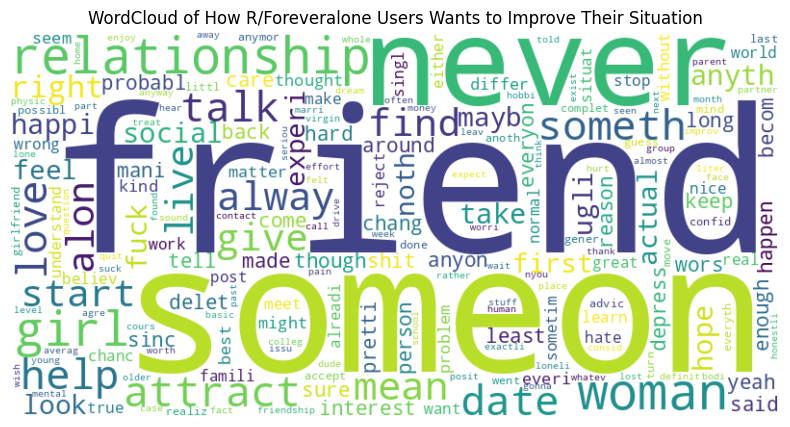

In [15]:
# Data Visualization
# WordCloud
all_words = ' '.join([word for tokens in df['tokens'] for word in tokens])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of How R/Foreveralone Users Wants to Improve Their Situation")
plt.show()

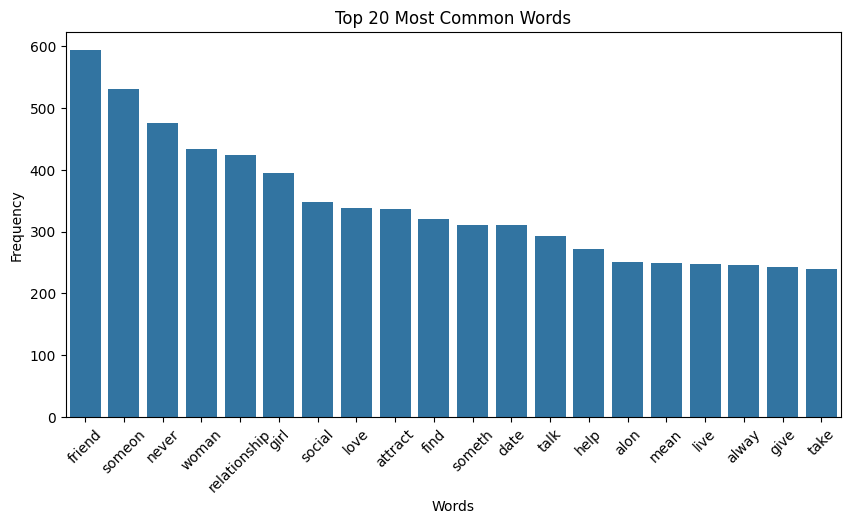

In [16]:
# Frequency Distribution of Words
all_words_flat = [word for tokens in df['tokens'] for word in tokens]
freq_dist = nltk.FreqDist(all_words_flat)
most_common = freq_dist.most_common(20)

plt.figure(figsize=(10, 5))
sns.barplot(x=[word for word, _ in most_common], y=[count for _, count in most_common])
plt.title("Top 20 Most Common Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [17]:
# Create Dictionary and Corpus for LDA
from gensim.corpora import Dictionary

# Create a dictionary
dictionary = Dictionary(df['tokens'])

# Create the corpus
corpus = [dictionary.doc2bow(doc) for doc in df['tokens']]

In [18]:
# Function to compute coherence and perplexity scores
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    perplexity_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
        model_list.append(model)
        coherence_model = gensim.models.CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
        perplexity_values.append(model.log_perplexity(corpus))
    return model_list, coherence_values, perplexity_values

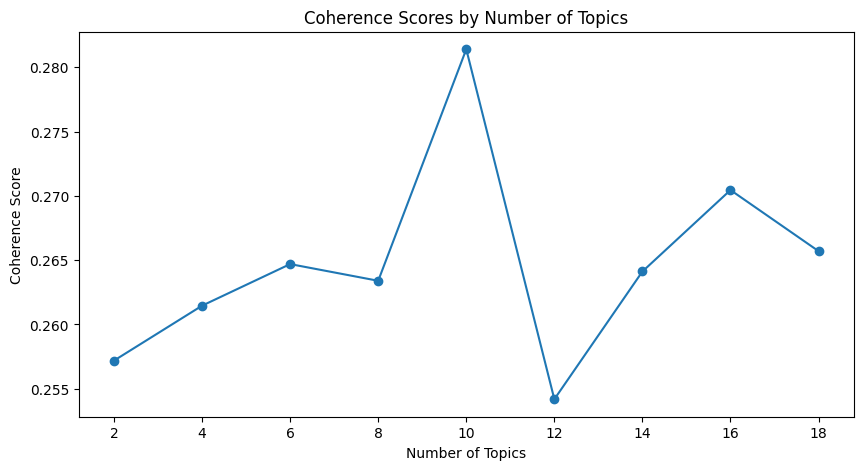

In [19]:
model_list, coherence_values, perplexity_values = compute_coherence_values(dictionary, corpus, df['tokens'], limit=20, start=2, step=2)

# Plot Coherence Scores
x = range(2, 20, 2)
plt.figure(figsize=(10, 5))
plt.plot(x, coherence_values, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores by Number of Topics")
plt.show()

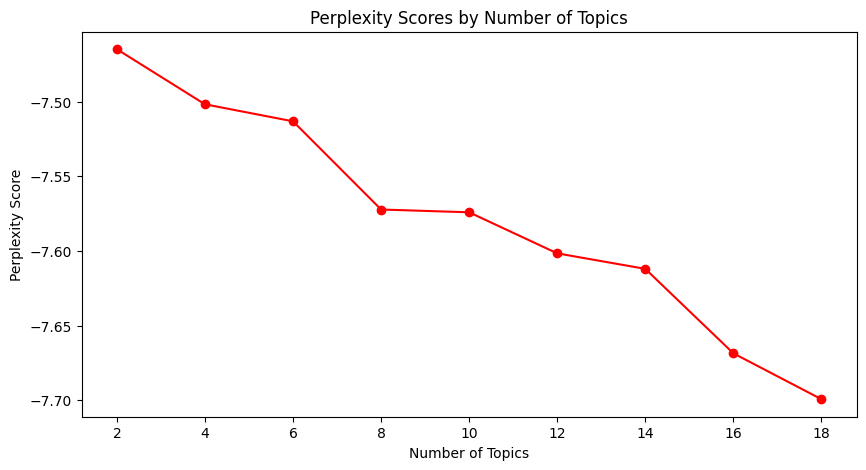

In [20]:
# Plot Perplexity Scores
plt.figure(figsize=(10, 5))
plt.plot(x, perplexity_values, marker='o', color='red')
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity Score")
plt.title("Perplexity Scores by Number of Topics")
plt.show()

In [21]:
from gensim.models import LdaModel
from pprint import pprint

cleaned_text = df['tokens']
topic_num = 6
word_num = 10

# Create document-term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in cleaned_text]

# Create LDA model
Lda = gensim.models.ldamodel.LdaModel
ldamodel = LdaModel(doc_term_matrix, num_topics=topic_num, id2word=dictionary, passes=20)

pprint(ldamodel.print_topics(num_topics=topic_num, num_words=word_num))


[(0,
  '0.008*"unwant" + 0.007*"help" + 0.005*"alcohol" + 0.004*"hate" + '
  '0.004*"take" + 0.004*"week" + 0.004*"someth" + 0.003*"food" + 0.003*"least" '
  '+ 0.003*"social"'),
 (1,
  '0.013*"woman" + 0.010*"ugli" + 0.006*"live" + 0.006*"attract" + '
  '0.006*"averag" + 0.005*"citi" + 0.005*"find" + 0.004*"plan" + 0.004*"wrong" '
  '+ 0.004*"someth"'),
 (2,
  '0.011*"love" + 0.007*"attract" + 0.007*"never" + 0.006*"someon" + '
  '0.006*"someth" + 0.006*"live" + 0.005*"friend" + 0.005*"happi" + '
  '0.004*"fuck" + 0.004*"take"'),
 (3,
  '0.008*"blood" + 0.007*"woman" + 0.007*"someon" + 0.007*"friend" + '
  '0.007*"virgin" + 0.005*"date" + 0.005*"take" + 0.005*"mean" + 0.005*"never" '
  '+ 0.005*"donat"'),
 (4,
  '0.012*"friend" + 0.009*"never" + 0.008*"girl" + 0.008*"someon" + '
  '0.007*"social" + 0.007*"woman" + 0.006*"attract" + 0.006*"date" + '
  '0.006*"find" + 0.006*"relationship"'),
 (5,
  '0.014*"relationship" + 0.011*"someon" + 0.008*"love" + 0.007*"woman" + '
  '0.006*"never

In [22]:
# Calculate coherence using CoherenceModel
coherence_model = gensim.models.CoherenceModel(model=ldamodel, texts=df['tokens'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print('Perplexity: ', ldamodel.log_perplexity(corpus))
print('Coherence: ', coherence_score)

Perplexity:  -7.519280237093858
Coherence:  0.2644301696845552


In [23]:
# Function to get topics for each document
def get_topics_for_documents(lda_model, corpus):
    topics_for_docs = []
    for doc in corpus:
        topics = lda_model.get_document_topics(doc)
        topics_for_docs.append(topics)
    return topics_for_docs

# Get topics for each document
topics_for_docs = get_topics_for_documents(ldamodel, corpus)

# Create a dictionary to store the document topics
dic_topic_doc = {}
for i in range(len(topics_for_docs)):
    for topic in topics_for_docs[i]:
        if topic[0] not in dic_topic_doc:
            dic_topic_doc[topic[0]] = []
        dic_topic_doc[topic[0]].append((i, topic[1])) # Store document index and topic probability

from IPython.display import display, Markdown
topic_doc_list = pd.DataFrame(columns=['Topic Id','Num of Documents',
                                       'Topic Words','List of Documents'])
print('\nTopic id, number of documents, list of documents with probability and represented topic words:')

for key, value in dic_topic_doc.items():
  sorted_value = sorted(value, key=lambda x: x[1], reverse=True)
  new_row = {'Topic Id': key,
             'Num of Documents': len(value),
             'Topic Words': ldamodel.print_topic(key, word_num),
             'List of Documents': ','.join(map(str,sorted_value))}
  # Concatenate with empty DataFrame to avoid reseting index
  topic_doc_list = pd.concat([topic_doc_list, pd.DataFrame([new_row])])
  # Alternative: Use append method (without ignore_index=True)
  # topic_doc_list = topic_doc_list.append(new_row)

display(Markdown(topic_doc_list.sort_values(by=['Topic Id']).to_markdown()))


Topic id, number of documents, list of documents with probability and represented topic words:


|    |   Topic Id |   Num of Documents | Topic Words                                                                                                                                                            | List of Documents                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
|---:|-----------:|-------------------:|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 |          0 |                 30 | 0.008*"unwant" + 0.007*"help" + 0.005*"alcohol" + 0.004*"hate" + 0.004*"take" + 0.004*"week" + 0.004*"someth" + 0.003*"food" + 0.003*"least" + 0.003*"social"          | (152, 0.991408),(168, 0.92145145),(147, 0.86391866),(23, 0.5319153),(178, 0.37749785),(53, 0.33112374),(1, 0.16666667),(4, 0.16666667),(5, 0.16666667),(10, 0.16666667),(22, 0.16666667),(25, 0.16666667),(28, 0.16666667),(31, 0.16666667),(70, 0.16666667),(73, 0.16666667),(78, 0.16666667),(81, 0.16666667),(98, 0.16666667),(105, 0.16666667),(114, 0.16666667),(131, 0.16666667),(154, 0.16666667),(172, 0.16666667),(173, 0.16666667),(175, 0.16666667),(184, 0.16666667),(185, 0.16666667),(156, 0.16564295),(133, 0.08742499)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
|  0 |          1 |                 32 | 0.013*"woman" + 0.010*"ugli" + 0.006*"live" + 0.006*"attract" + 0.006*"averag" + 0.005*"citi" + 0.005*"find" + 0.004*"plan" + 0.004*"wrong" + 0.004*"someth"           | (141, 0.9957268),(45, 0.9924256),(92, 0.7478395),(111, 0.6764794),(64, 0.65814966),(60, 0.49347785),(120, 0.29327163),(115, 0.2748974),(1, 0.16666667),(4, 0.16666667),(5, 0.16666667),(10, 0.16666667),(22, 0.16666667),(25, 0.16666667),(28, 0.16666667),(31, 0.16666667),(70, 0.16666667),(73, 0.16666667),(78, 0.16666667),(81, 0.16666667),(98, 0.16666667),(105, 0.16666667),(114, 0.16666667),(131, 0.16666667),(154, 0.16666667),(172, 0.16666667),(173, 0.16666667),(175, 0.16666667),(184, 0.16666667),(185, 0.16666667),(97, 0.124683),(65, 0.09271952)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
|  0 |          2 |                 46 | 0.011*"love" + 0.007*"attract" + 0.007*"never" + 0.006*"someon" + 0.006*"someth" + 0.006*"live" + 0.005*"friend" + 0.005*"happi" + 0.004*"fuck" + 0.004*"take"         | (159, 0.9979584),(36, 0.99709344),(151, 0.9969126),(71, 0.9968536),(171, 0.99603724),(100, 0.9933381),(29, 0.9844025),(164, 0.93324393),(125, 0.92189384),(186, 0.91543883),(74, 0.8066678),(187, 0.79571056),(144, 0.7934657),(20, 0.63502216),(18, 0.60393727),(6, 0.4908972),(115, 0.48107666),(129, 0.4721011),(137, 0.33541214),(99, 0.28798985),(165, 0.283536),(106, 0.2337631),(9, 0.18150309),(1, 0.16666667),(4, 0.16666667),(5, 0.16666667),(10, 0.16666667),(22, 0.16666667),(25, 0.16666667),(28, 0.16666667),(31, 0.16666667),(70, 0.16666667),(73, 0.16666667),(78, 0.16666667),(81, 0.16666667),(98, 0.16666667),(105, 0.16666667),(114, 0.16666667),(131, 0.16666667),(154, 0.16666667),(172, 0.16666667),(173, 0.16666667),(175, 0.16666667),(184, 0.16666667),(185, 0.16666667),(121, 0.13507879)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
|  0 |          3 |                 52 | 0.008*"blood" + 0.007*"woman" + 0.007*"someon" + 0.007*"friend" + 0.007*"virgin" + 0.005*"date" + 0.005*"take" + 0.005*"mean" + 0.005*"never" + 0.005*"donat"          | (132, 0.99917096),(103, 0.9982651),(174, 0.9967539),(94, 0.99628377),(35, 0.9953578),(162, 0.994914),(62, 0.99477696),(87, 0.9926888),(82, 0.9744212),(122, 0.9649476),(180, 0.88369787),(102, 0.7805911),(15, 0.763229),(149, 0.75556004),(136, 0.7277776),(43, 0.71345663),(11, 0.6474069),(161, 0.64254284),(163, 0.55086195),(167, 0.5141544),(13, 0.49616787),(67, 0.39537126),(60, 0.39304882),(119, 0.37745216),(158, 0.34450284),(99, 0.34019825),(58, 0.24529067),(109, 0.22151281),(128, 0.19590273),(1, 0.16666667),(4, 0.16666667),(5, 0.16666667),(10, 0.16666667),(22, 0.16666667),(25, 0.16666667),(28, 0.16666667),(31, 0.16666667),(70, 0.16666667),(73, 0.16666667),(78, 0.16666667),(81, 0.16666667),(98, 0.16666667),(105, 0.16666667),(114, 0.16666667),(131, 0.16666667),(154, 0.16666667),(172, 0.16666667),(173, 0.16666667),(175, 0.16666667),(184, 0.16666667),(185, 0.16666667),(176, 0.02212477)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
|  0 |          4 |                149 | 0.012*"friend" + 0.009*"never" + 0.008*"girl" + 0.008*"someon" + 0.007*"social" + 0.007*"woman" + 0.006*"attract" + 0.006*"date" + 0.006*"find" + 0.006*"relationship" | (139, 0.99946344),(166, 0.9994352),(0, 0.99943215),(2, 0.99940425),(55, 0.9992728),(32, 0.999015),(118, 0.99901223),(68, 0.9988997),(110, 0.99884766),(8, 0.9986226),(39, 0.99859256),(37, 0.99858594),(113, 0.99845374),(143, 0.9984414),(16, 0.99839115),(42, 0.99836934),(50, 0.9983433),(48, 0.9983387),(14, 0.9981379),(117, 0.99806094),(38, 0.9980544),(83, 0.99802554),(181, 0.997977),(177, 0.99795574),(66, 0.9979462),(24, 0.99793035),(112, 0.99791557),(127, 0.9978517),(169, 0.99784654),(7, 0.9978168),(56, 0.99776435),(34, 0.9976969),(88, 0.99769175),(146, 0.9974405),(33, 0.9973522),(145, 0.9972966),(138, 0.9970108),(59, 0.9968938),(30, 0.9967834),(44, 0.99677247),(17, 0.9967339),(52, 0.9966797),(116, 0.996514),(142, 0.9958642),(86, 0.9953603),(108, 0.9951744),(49, 0.99513966),(57, 0.9950574),(123, 0.99436677),(104, 0.9935912),(61, 0.9897646),(157, 0.98863584),(47, 0.98847485),(170, 0.9883448),(40, 0.9872908),(26, 0.9868979),(41, 0.97898245),(176, 0.97666025),(12, 0.93062603),(84, 0.8943344),(65, 0.89410216),(54, 0.88611126),(121, 0.83442503),(9, 0.8133987),(128, 0.7987223),(77, 0.77490616),(182, 0.77266884),(109, 0.769275),(106, 0.7618168),(135, 0.7263874),(165, 0.71548784),(124, 0.68768144),(19, 0.6732302),(150, 0.6704323),(133, 0.66825366),(148, 0.66790855),(137, 0.66236204),(158, 0.65442973),(183, 0.6427527),(119, 0.6207359),(178, 0.6179261),(67, 0.6034844),(3, 0.55859774),(13, 0.5032856),(107, 0.48908556),(167, 0.48365438),(91, 0.48154935),(163, 0.44846797),(18, 0.39307684),(179, 0.39263234),(99, 0.37011048),(20, 0.36356112),(6, 0.36223614),(161, 0.35448223),(11, 0.34256378),(80, 0.33893862),(27, 0.33740005),(64, 0.3335352),(111, 0.32191133),(43, 0.27478397),(136, 0.2658823),(92, 0.25133443),(149, 0.2427401),(15, 0.23615319),(115, 0.23432763),(72, 0.23352869),(144, 0.20557517),(74, 0.19244123),(1, 0.16666667),(4, 0.16666667),(5, 0.16666667),(10, 0.16666667),(22, 0.16666667),(25, 0.16666667),(28, 0.16666667),(31, 0.16666667),(70, 0.16666667),(73, 0.16666667),(78, 0.16666667),(81, 0.16666667),(98, 0.16666667),(105, 0.16666667),(114, 0.16666667),(131, 0.16666667),(154, 0.16666667),(172, 0.16666667),(173, 0.16666667),(175, 0.16666667),(184, 0.16666667),(185, 0.16666667),(63, 0.1350514),(76, 0.13417229),(147, 0.13246442),(60, 0.10801233),(180, 0.10596943),(101, 0.10358031),(186, 0.0833155),(125, 0.077354036),(168, 0.07702144),(164, 0.064824075),(23, 0.06333848),(120, 0.060729034),(79, 0.059548214),(95, 0.05454358),(187, 0.05452858),(82, 0.018933),(69, 0.018481662),(85, 0.016089426),(29, 0.012809672) |
|  0 |          5 |                 73 | 0.014*"relationship" + 0.011*"someon" + 0.008*"love" + 0.007*"woman" + 0.006*"never" + 0.006*"cheat" + 0.005*"alon" + 0.005*"friend" + 0.005*"famili" + 0.005*"happi"  | (93, 0.99947625),(153, 0.99902505),(21, 0.9986324),(90, 0.998457),(155, 0.99809295),(51, 0.99770194),(130, 0.9970735),(96, 0.9963479),(126, 0.99573207),(75, 0.9937813),(140, 0.99151665),(160, 0.99134046),(89, 0.9899936),(46, 0.98940283),(85, 0.982148),(69, 0.97794324),(134, 0.9558048),(95, 0.9429866),(79, 0.9330693),(101, 0.89140433),(97, 0.8703371),(76, 0.86016864),(63, 0.859203),(156, 0.81398535),(72, 0.7651387),(58, 0.7449771),(53, 0.6612294),(27, 0.6562047),(80, 0.64987695),(120, 0.6416116),(179, 0.6058192),(129, 0.51916957),(91, 0.5149322),(107, 0.5093103),(3, 0.4407335),(23, 0.40235662),(183, 0.35617054),(148, 0.32941532),(19, 0.32479858),(150, 0.32446465),(124, 0.307515),(135, 0.26972908),(133, 0.24161166),(182, 0.22405827),(102, 0.21594726),(77, 0.21288645),(1, 0.16666667),(4, 0.16666667),(5, 0.16666667),(10, 0.16666667),(22, 0.16666667),(25, 0.16666667),(28, 0.16666667),(31, 0.16666667),(70, 0.16666667),(73, 0.16666667),(78, 0.16666667),(81, 0.16666667),(98, 0.16666667),(105, 0.16666667),(114, 0.16666667),(131, 0.16666667),(154, 0.16666667),(172, 0.16666667),(173, 0.16666667),(175, 0.16666667),(184, 0.16666667),(185, 0.16666667),(187, 0.14693326),(6, 0.14626247),(54, 0.11113582),(84, 0.10401352),(12, 0.067910366)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |

In [24]:
# plotting tools
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

# visualize the topics and keywords
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
vis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 29.4 MB/s eta 0:00:00


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.067798 -0.008445       1        1  57.478471
5      0.064271 -0.003533       2        1  16.532505
3      0.056386  0.025959       3        1  11.872389
2      0.024681  0.018597       4        1   9.937917
1     -0.081772 -0.108939       5        1   2.710114
0     -0.131364  0.076362       6        1   1.468603, topic_info=        Term        Freq       Total Category  logprob  loglift
734    woman  400.000000  400.000000  Default  30.0000  30.0000
685     ugli  175.000000  175.000000  Default  29.0000  29.0000
47   attract  317.000000  317.000000  Default  28.0000  28.0000
302     help  249.000000  249.000000  Default  27.0000  27.0000
385     love  310.000000  310.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
19      alon    2.164247  234.559910   Topic6  -6.0348  -0.4648
396     mayb    2.020785  184.865623   Topic6  -6.1034  -0.2953
389     make    1.918575  105.137884   Topic6  -6.1553   0.2172
247     feel    1.972310  174.719170   Topic6  -6.1276  -0.2631
455     noth    1.925567  209.305955   Topic6  -6.1516  -0.4677

[498 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1161      2  0.170645  abnorm
1161      3  0.682581  abnorm
746       1  0.267797    abus
746       2  0.595104    abus
746       3  0.089266    abus
...     ...       ...     ...
743       2  0.186034    yeah
743       3  0.159458    yeah
743       4  0.079729    yeah
743       5  0.013288    yeah
5613      6  0.584169    yike

[1119 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 4, 3, 2, 1])